In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.stats as stats
%matplotlib inline

In [2]:
t = 0.5
sigma = 0.2
def model(x):
  return t*x**3 + sigma*np.random.randn()


In [3]:
D = np.random.uniform(-2,2,25)
D = np.sort(D)
Y = [model(d) for d in D]


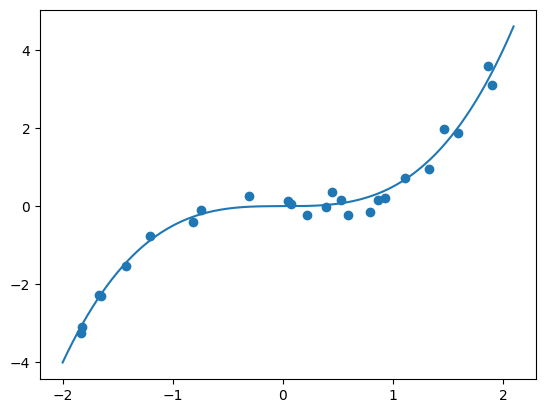

In [5]:
# D,Y
plt.scatter(D,Y)
D_plot = np.arange(-2, 2.1, 0.015)
plt.plot(D_plot, t*D_plot**3)

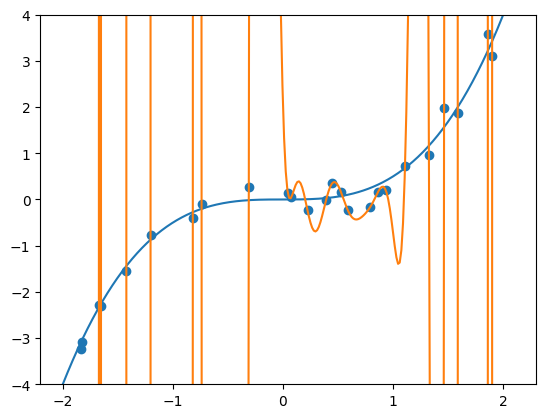

In [8]:
z = np.polyfit(D,Y, len(D)-1)
p = np.poly1d(z)
plt.scatter(D,Y)
plt.plot(D_plot, t*D_plot**3)
plt.ylim(-4,4)
plt.plot(D_plot, p(D_plot))

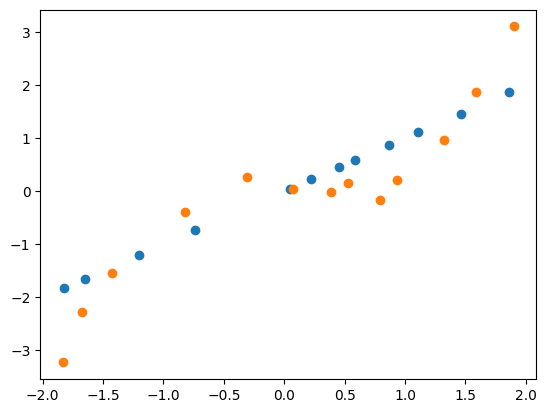

In [9]:
D_train = D[1::2]
Y_train = D[1::2]
D_val = D[::2]
Y_val = Y[::2]

plt.scatter(D_train, Y_train)
plt.scatter(D_val, Y_val)


In [14]:
def get_error(deg):
  val_error = np.zeros(deg)
  train_error = np.zeros(deg)

  for i in range(deg):
    z = np.polyfit(D_train, Y_train, i)
    p = np.poly1d(z)
    train_error[i] = (np.mean((p(D_train - Y_train))**2))
    val_error[i] = (np.mean((p(D_val) - Y_val)**2))

  return train_error, val_error


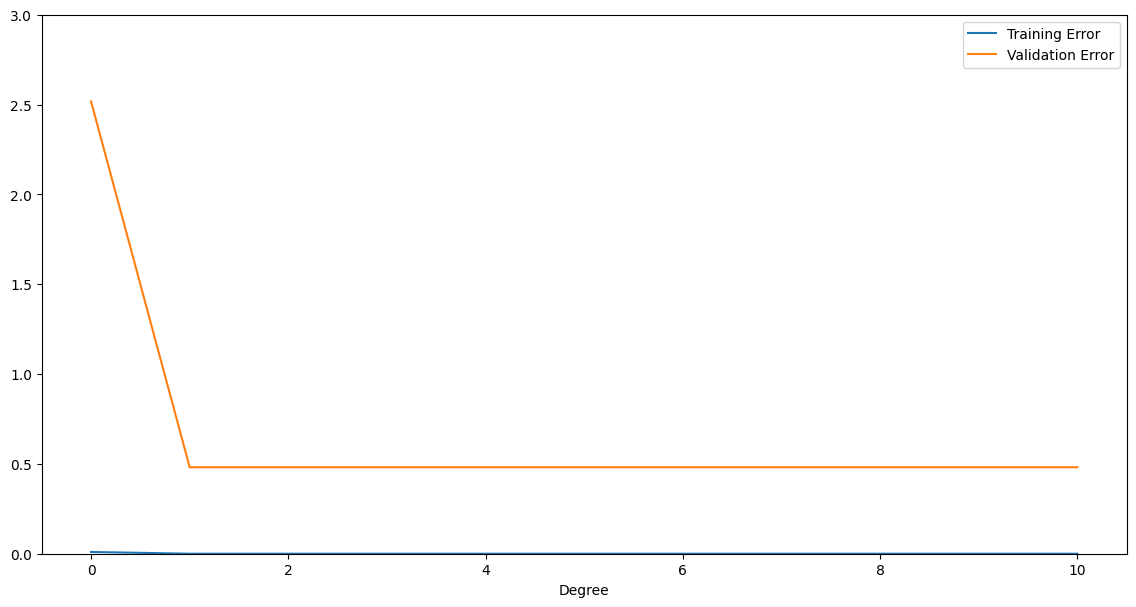

In [15]:
train_error , val_error = get_error(len(D_train) - 1)
plt.figure(figsize=(14,7))
plt.plot(train_error, label='Training Error')
plt.ylim(0,3)
plt.plot(val_error, label='Validation Error')
plt.xlabel("Degree")
plt.legend()

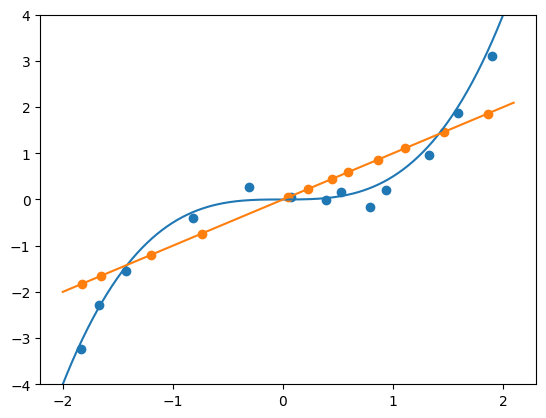

In [16]:
z = np.polyfit(D_train, Y_train, len(D_train) - 1)
p = np.poly1d(z)
plt.scatter(D_val, Y_val)
plt.scatter(D_train, Y_train)
plt.plot(D_plot, t*D_plot**3)
plt.ylim(-4,4)
plt.plot(D_plot, p(D_plot))

In [17]:
# R(f) = E[(f(x) - y)^2]
# Risk factor :: average is taken over the randomness of(x,y). In our
# case we simulate the true model with X ~ Unif[-2,2] and Y=0.5*X^3 + random_(sigma, epsilon)
# epsilon ~ N(0,1)






In [18]:
def get_risk(deg):
  risk = np.zeros(deg)
  for i in range(deg):
    z = np.polyfit(D_train, Y_train, i)
    p = np.poly1d(z)
    fun_int = lambda e,x: (p(x)-t*x**3 - sigma*e)**2 * stats.norm.pdf(e)/4
    risk[i] = integrate.dblquad(fun_int, -2,2, lambda x: -10,lambda x: 10)[0]
  return risk

In [19]:
risk = get_risk(len(D_train) - 1)


In [20]:
def opti_risk(x):
  if int(x)==0:
    return t**2*2**6/7+sigma**2
  elif int(x)==1:
    return t**2*2**6/7+sigma**2-t**2*2**6/5**2*3
  elif int(x)==2:
    pass
  else:
    return sigma**2


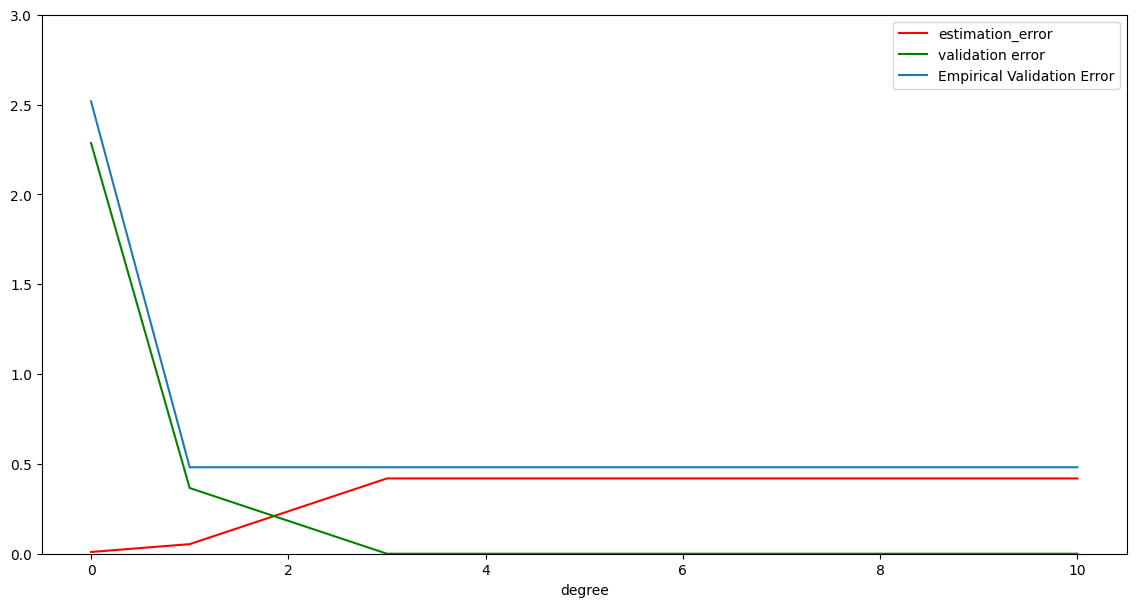

In [21]:
deg = [0,1,3,4,5,6,7,8,9,10]
plt.figure(figsize=(14,7))
plt.ylim(0,3)
plt.plot(deg, [risk[int(d)] -opti_risk(d) for d in deg], color='red', label='estimation_error')
plt.plot(deg, [opti_risk(d) - sigma**2 for d in deg], color='green', label='validation error')
plt.plot(val_error, label='Empirical Validation Error')
plt.xlabel("degree")
plt.legend()

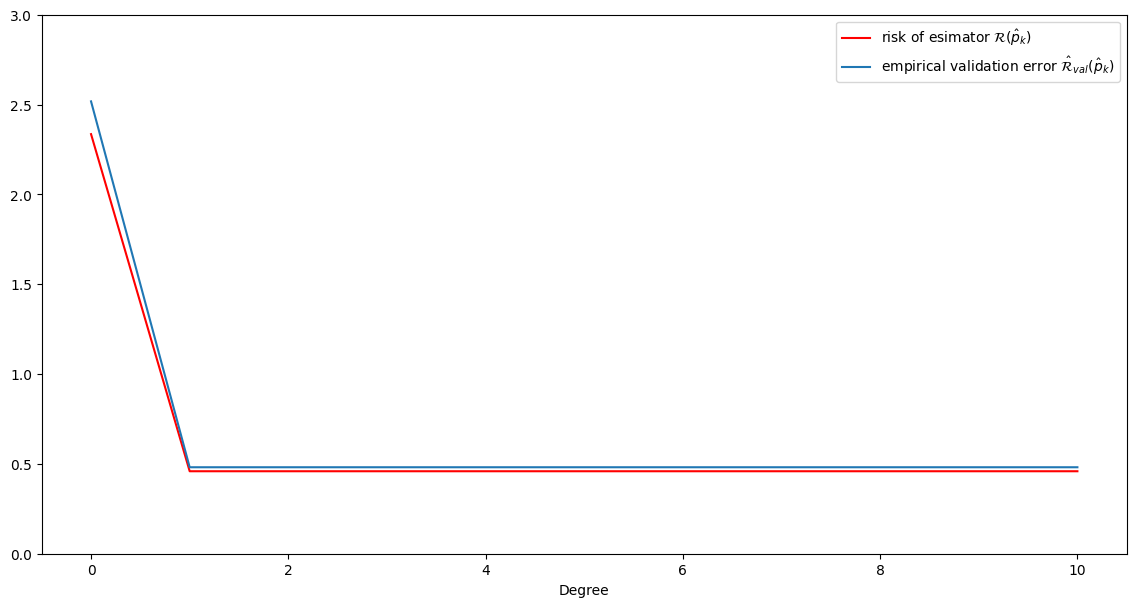

In [22]:
plt.figure(figsize=(14,7))
plt.ylim(0, 3)
plt.plot(risk, color='red',label='risk of esimator $\mathcal{R}(\hat{p}_k)$')
plt.plot(val_error, label='empirical validation error $\hat{\mathcal{R}}_{val}(\hat{p}_k)$')
plt.xlabel("Degree")
plt.legend();